Optimize the portfolio.
=====



In [1]:
from mypo import Runner, Loader
from mypo.rebalancer import MonthlyRebalancer
from mypo.optimizer import MinimumVarianceOptimizer, SharpRatioOptimizer
from mypo.indicator import yearly_total_return, max_drawdown, max_drawdown_span
import numpy as np

In [2]:
loader = Loader()

In [3]:
loader.get('VOO', 0.0003)
loader.get('EDV', 0.0007)

In [4]:
market = loader.get_market()

100%|██████████| 2454/2454 [00:05<00:00, 410.54it/s]


[0.39969736 0.60030264]
1.1258027617288884
0.8688225158449558
229


<AxesSubplot:>

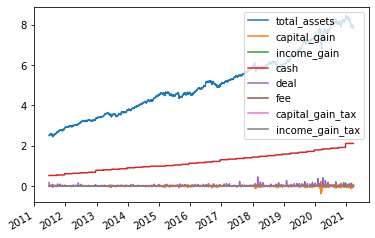

In [5]:
optimizer = MinimumVarianceOptimizer()
runner = Runner(
    assets=[1.2, 0.8],
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
    cash=0.5
)

runner.run(
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(optimizer.get_weights())
print(yearly_total_return(report))
print(max_drawdown(report))
print(max_drawdown_span(report))
report.plot()

100%|██████████| 2454/2454 [00:06<00:00, 406.86it/s]


[0.29286531 0.70713469]
1.1205912436563183
0.8718984537348183
232


<AxesSubplot:>

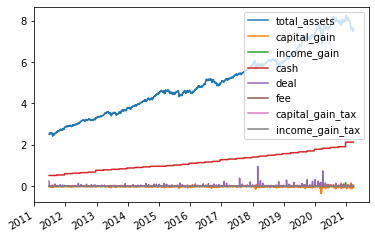

In [6]:
optimizer = MinimumVarianceOptimizer(with_semi_covariance=True)

runner = Runner(
    assets=[1.2, 0.8],
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
    cash=0.5
)

runner.run(
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(optimizer.get_weights())
print(yearly_total_return(report))
print(max_drawdown(report))
print(max_drawdown_span(report))
report.plot()

 45%|████▌     | 1110/2454 [00:02<00:03, 409.40it/s]/app/mypo/runner.py:108: RuntimeWarning: divide by zero encountered in true_divide
  self._average_assets_prices = (
/app/mypo/runner.py:109: RuntimeWarning: invalid value encountered in multiply
  self._average_assets_prices * previous_assets + diff * trading_prices
100%|██████████| 2454/2454 [00:06<00:00, 400.89it/s]


[0.50207736 0.49792264]
1.1103052665244668
0.8658993115231367
318


<AxesSubplot:>

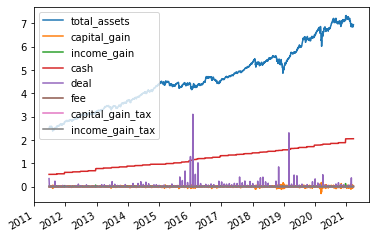

In [7]:
optimizer = SharpRatioOptimizer()

runner = Runner(
    assets=[1.2, 0.8],
    rebalancer=MonthlyRebalancer(optimizer=optimizer, do_re_optimize=True),
    cash=0.5
)

runner.run(
    market=market,
    train_span=200,
    verbose=True
)
report = runner.report()
print(optimizer.get_weights())
print(yearly_total_return(report))
print(max_drawdown(report))
print(max_drawdown_span(report))
report.plot()